In [29]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [30]:
x, y = make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)

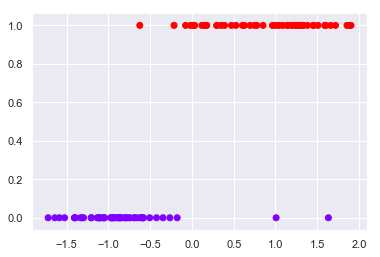

In [31]:
plt.scatter(x, y, c=y, cmap='rainbow')

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [33]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

/Users/geschew/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
print(lr.coef_)
print(lr.intercept_)

[[2.35064852]]
[-0.0167224]


In [35]:
y_pred = lr.predict(x_test)

In [36]:
confusion_matrix(y_test, y_pred)

array([[15,  0],
       [ 3,  7]])

In [37]:
lr.predict_proba(x_test)

array([[0.83925913, 0.16074087],
       [0.93113274, 0.06886726],
       [0.853027  , 0.146973  ],
       [0.30862831, 0.69137169],
       [0.54812667, 0.45187333],
       [0.62698804, 0.37301196],
       [0.96525744, 0.03474256],
       [0.90587628, 0.09412372],
       [0.0117754 , 0.9882246 ],
       [0.83633501, 0.16366499],
       [0.8605665 , 0.1394335 ],
       [0.12074798, 0.87925202],
       [0.82686047, 0.17313953],
       [0.89437958, 0.10562042],
       [0.95550595, 0.04449405],
       [0.8052369 , 0.1947631 ],
       [0.14859148, 0.85140852],
       [0.94557509, 0.05442491],
       [0.40538129, 0.59461871],
       [0.93183287, 0.06816713],
       [0.16489398, 0.83510602],
       [0.18868189, 0.81131811],
       [0.6060169 , 0.3939831 ],
       [0.97340984, 0.02659016],
       [0.51431552, 0.48568448]])

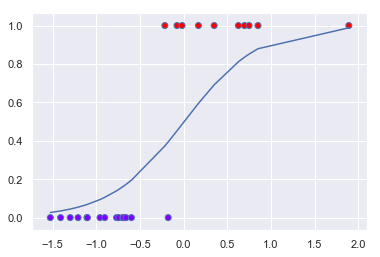

In [38]:
df = pd.DataFrame({'x': x_test[:,0], 'y': y_test})
df = df.sort_values(by='x')
from scipy.special import expit
sigmoid_function = expit(df['x'] * lr.coef_[0][0] + lr.intercept_[0]).ravel()
plt.plot(df['x'], sigmoid_function)
plt.scatter(df['x'], df['y'], c=df['y'], cmap='rainbow', edgecolors='b')

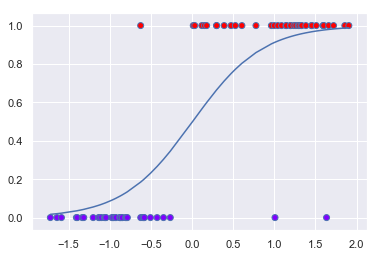

In [39]:
df = pd.DataFrame({'x': x_train[:,0], 'y': y_train})
df = df.sort_values(by='x')
from scipy.special import expit
sigmoid_function = expit(df['x'] * lr.coef_[0][0] + lr.intercept_[0]).ravel()
plt.plot(df['x'], sigmoid_function)
plt.scatter(df['x'], df['y'], c=df['y'], cmap='rainbow', edgecolors='b')